**1. Importing Necessary libraries**

In [1]:
import pandas as pd
import os
import glob
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
#combining no of csv file into one file with name combine_csv
#os.chdir('C:\Users\LILA\Desktop\RTT-RSS with Kalman_offset\Kalman_offset')
os.chdir('C:/Users/LILA/Desktop/RTT-RSS with Kalman_offset/Kalman_offset')
#os.chdir('C:/Users/LILA/Desktop/RTT-RSS with Kalman_offset/Offset new')
extension='csv'

all_filenames=[i for i in glob.glob('*.{}'.format(extension))]

combined_csv=pd.concat([pd.read_csv(f) for f in all_filenames])
df=combined_csv
#df.drop(['Error_before_offset','Error_after_offset','stdev','Est_Range'],axis=1,inplace=True)
df

,RTT,RSS,TRUE
0,9.718131,-72.000000,10
1,9.862571,-69.494567,10
2,10.050465,-70.335750,10
3,10.057071,-70.504328,10
4,10.097482,-69.785318,10
...,...,...,...
291,8.964837,-61.387418,9
292,8.958309,-61.276177,9
293,8.918245,-61.173856,9
294,8.960933,-61.079739,9


**2. Extracting input and output data from Dataframe**

In [3]:
input_data = df.iloc[:, :2]
output_data = df['TRUE'].values
#output_data = df['True_Range'].values
output_data = np.array(output_data)
input_data

,RTT,RSS
0,9.718131,-72.000000
1,9.862571,-69.494567
2,10.050465,-70.335750
3,10.057071,-70.504328
4,10.097482,-69.785318
...,...,...
291,8.964837,-61.387418
292,8.958309,-61.276177
293,8.918245,-61.173856
294,8.960933,-61.079739


In [4]:
input_data = input_data.values #conversting dataframe format to array format
#input_data = input_data.reshape(-1,1)
X=input_data
X

array([[  9.71813087, -72.        ],
       [  9.86257107, -69.49456676],
       [ 10.05046483, -70.33574986],
       ...,
       [  8.91824468, -61.17385598],
       [  8.96093334, -61.0797385 ],
       [  9.01424539, -61.07334523]])

In [5]:
output_data

array([10, 10, 10, ...,  9,  9,  9], dtype=int64)

**3. Creating Multiple class using Onehot Encoder of output**

In [6]:

from sklearn.preprocessing import OneHotEncoder
# Create a one-hot encoder object
one_hot_encoder = OneHotEncoder()

# Fit and transform the one-hot encoder on your output data
output_data = np.array(output_data)
encoded_output = one_hot_encoder.fit_transform(output_data.reshape(-1,1))
# Convert the encoded output data to a NumPy array format
#encoded_output = np.array(encoded_output)
encoded_output = encoded_output.toarray()
y=encoded_output


In [7]:
#output_data=output_data.values

In [8]:
input_data

array([[  9.71813087, -72.        ],
       [  9.86257107, -69.49456676],
       [ 10.05046483, -70.33574986],
       ...,
       [  8.91824468, -61.17385598],
       [  8.96093334, -61.0797385 ],
       [  9.01424539, -61.07334523]])

**4. Importing necessary libraries and create the DNN model**

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
from keras.optimizers import Adam
from keras.layers import Dropout

optimizer = Adam(learning_rate=0.0001)

# Initialize the model
model = Sequential()

# Add the first hidden layer with 64 neurons and input shape as the shape of the input data
model.add(Dense(64, activation='relu', input_shape=(2,)))

# Add the second hidden layer with 128 neurons
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))

# Add the third hidden layer with 128 neurons
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))

# Add the fourth hidden layer with 32 neurons
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

# Add the output layer with 25 neurons for the 25 categories, and use softmax activation for multiclass classification
model.add(Dense(25, activation='softmax'))

# Compile the model, using categorical_crossentropy loss for multiclass classification, and 'adam' optimizer
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 25)                1625      
                                                                 
Total params: 34,905
Trainable params: 34,905
Non-trainable params: 0
_________________________________________________________________


In [10]:
from sklearn.model_selection import train_test_split

# assuming your data is in X and y variables
#X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(input_data, encoded_output, test_size=0.3, random_state=42)

In [11]:
X_train

array([[ 22.01320001, -78.39659914],
       [  7.89807215, -62.70303998],
       [  7.91988335, -62.64872476],
       ...,
       [  3.01765946, -59.98608869],
       [ 12.20174644, -62.02017815],
       [  9.23302068, -60.63309277]])

**5. Standarizing the data- Preprocessing**

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
#X_val = sc.fit_transform(X_val)
X_train.shape

(5175, 2)

In [13]:
X_train

array([[ 1.2437804 , -1.53346284],
       [-0.705526  ,  0.52470931],
       [-0.70251386,  0.53183262],
       ...,
       [-1.37951349,  0.88103087],
       [-0.11118637,  0.61426498],
       [-0.52116892,  0.79617786]])

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
early_stopping = keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, callbacks=[early_stopping])

Epoch 1/500
162/162 [==============================] - 2s 2ms/step - loss: 3.0878 - accuracy: 0.1662 - val_loss: 2.9138 - val_accuracy: 0.2041
Epoch 2/500
162/162 [==============================] - 0s 1ms/step - loss: 2.6224 - accuracy: 0.2176 - val_loss: 2.3139 - val_accuracy: 0.2776
Epoch 3/500
162/162 [==============================] - 0s 1ms/step - loss: 2.0083 - accuracy: 0.2999 - val_loss: 1.7574 - val_accuracy: 0.3497
Epoch 4/500
162/162 [==============================] - 0s 1ms/step - loss: 1.5438 - accuracy: 0.4877 - val_loss: 1.3674 - val_accuracy: 0.5723
Epoch 5/500
162/162 [==============================] - 0s 1ms/step - loss: 1.2122 - accuracy: 0.6653 - val_loss: 1.0844 - val_accuracy: 0.6692
Epoch 6/500
162/162 [==============================] - 0s 1ms/step - loss: 0.9805 - accuracy: 0.7480 - val_loss: 0.8834 - val_accuracy: 0.7733
Epoch 7/500
162/162 [==============================] - 0s 978us/step - loss: 0.8130 - accuracy: 0.7965 - val_loss: 0.7411 - val_accuracy: 0.80

In [17]:
## evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

70/70 [==============================] - 0s 520us/step - loss: 0.0536 - accuracy: 0.9878
Test loss: 0.05362936854362488
Test accuracy: 0.9878323674201965


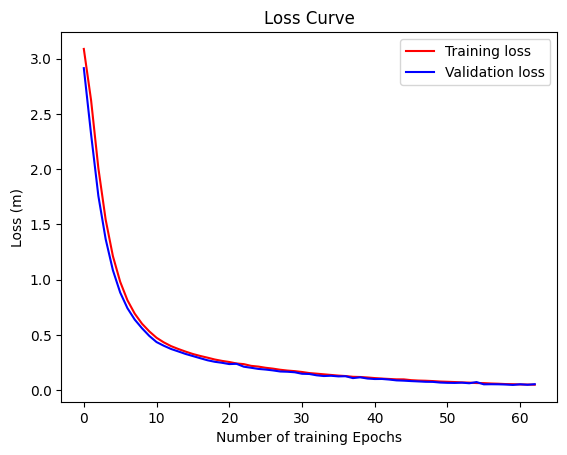

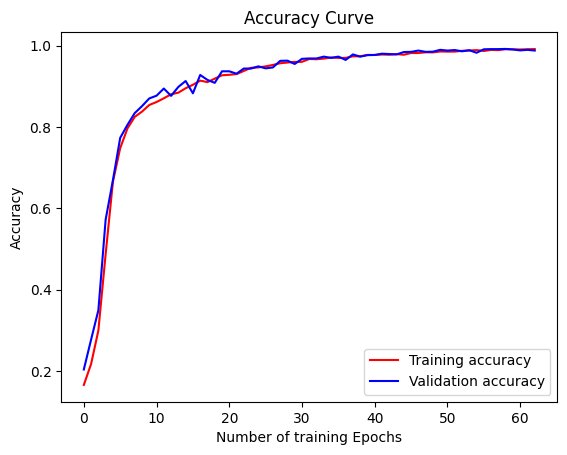

In [18]:
# Plot the loss curve
plt.plot(history.history['loss'], 'r', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss' )
plt.title('Loss Curve')
plt.xlabel('Number of training Epochs')
plt.ylabel('Loss (m)')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], 'r', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Number of training Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
y_pred = model.predict(X_test)

70/70 [==============================] - 0s 477us/step


In [20]:
y_pred

array([[2.7941696e-02, 9.7204506e-01, 1.5161682e-07, ..., 2.4854197e-27,
        4.3444691e-31, 8.3384811e-31],
       [1.7862930e-03, 9.9818307e-01, 2.0797668e-06, ..., 8.1883531e-28,
        1.1125638e-31, 2.1968795e-30],
       [4.1439350e-09, 1.1777637e-02, 1.0115342e-02, ..., 9.0244186e-23,
        2.7733001e-28, 4.3359733e-26],
       ...,
       [7.3694506e-36, 0.0000000e+00, 1.4024704e-30, ..., 3.8996584e-26,
        9.7975451e-31, 9.9965036e-01],
       [4.5648447e-21, 4.6987828e-29, 5.5244459e-31, ..., 2.2280918e-07,
        4.9246763e-14, 3.0150413e-19],
       [6.3127683e-33, 1.6199569e-38, 0.0000000e+00, ..., 1.6206875e-29,
        7.2233301e-35, 0.0000000e+00]], dtype=float32)

In [21]:
y_pred.shape

(2219, 25)

In [22]:
# Decode the one-hot encoded data
#y_pred= one_hot_encoder.inverse_transform(y_pred)
y_pred= np.argmax(y_pred, axis=1)
# Convert the decoded output data to a NumPy array format
y_pred = np.array(y_pred)

# Print the decoded output data
print(y_pred)

[ 1  1  3 ... 24 17 12]


In [23]:
y_pred=y_pred.flatten()
y_pred

array([ 1,  1,  3, ..., 24, 17, 12], dtype=int64)

In [24]:
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
# Decode the one-hot encoded data
#y_test= one_hot_encoder.inverse_transform(y_test)
y_test=np.argmax(y_test, axis=1)
# Convert the decoded output data to a NumPy array format
y_test = np.array(y_test)

# Print the decoded output data
print(y_test)

[ 1  1  3 ... 24 17 12]


In [26]:
y_test = y_test.flatten()
y_test

array([ 1,  1,  3, ..., 24, 17, 12], dtype=int64)

In [28]:
pip install seaborn

     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     -------------------------------------  286.7/293.3 kB 8.9 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 6.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


**6. Confusion Matrix and Classification Report**

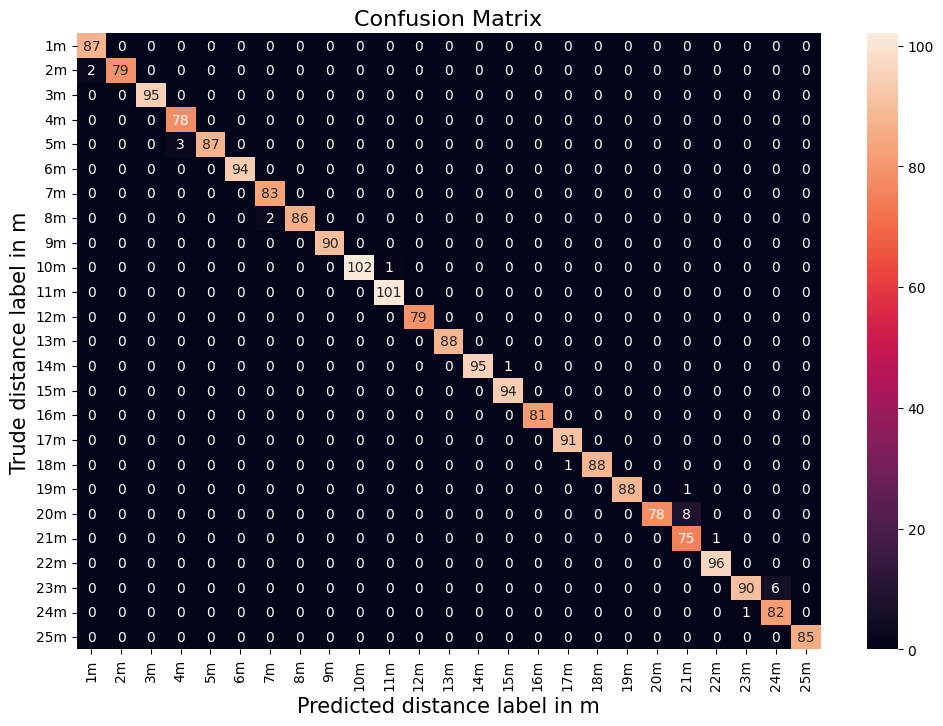

Accuracy of Model with Calibrated data:  0.9878323569175305


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, classification_report
import seaborn as sns

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
array=np.array(conf_mat)
df_cm = pd.DataFrame(array, index = [str(i)+"m" for i in range(1,26)],
                  columns = [str(i)+"m" for i in range(1,26)])

plt.figure(figsize = (12,8))

# import seaborn as sns
# sns.heatmap(df_cm, annot=True)

a=sns.heatmap(df_cm, annot=True, fmt='d')
a.set_xlabel('Predicted distance label in m', fontsize=15)
a.set_ylabel('Trude distance label in m', fontsize=15)
plt.title('Confusion Matrix', fontsize=16)
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Model with Calibrated data: ', accuracy)

In [30]:
# Create a custom label for each class
labels = [f"{i + 1}m" for i in range(25)]

# Generate the classification report
print(classification_report(y_test, y_pred, target_names=labels))


              precision    recall  f1-score   support

          1m       0.98      1.00      0.99        87
          2m       1.00      0.98      0.99        81
          3m       1.00      1.00      1.00        95
          4m       0.96      1.00      0.98        78
          5m       1.00      0.97      0.98        90
          6m       1.00      1.00      1.00        94
          7m       0.98      1.00      0.99        83
          8m       1.00      0.98      0.99        88
          9m       1.00      1.00      1.00        90
         10m       1.00      0.99      1.00       103
         11m       0.99      1.00      1.00       101
         12m       1.00      1.00      1.00        79
         13m       1.00      1.00      1.00        88
         14m       1.00      0.99      0.99        96
         15m       0.99      1.00      0.99        94
         16m       1.00      1.00      1.00        81
         17m       0.99      1.00      0.99        91
         18m       1.00    

In [31]:
model.save('model.h5')

In [32]:
from tensorflow.keras.models import load_model

trained_model = load_model('model.h5')

Precision: number of true positives divided by the number of true positives and false positives

Recall: number of true positives divided by the number of true positives and false negatives

F1-score: the harmonic mean of precision and recall

Support: number of samples in the corresponding class.

